In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/Base Contexto.xlsx', sheet_name=1)

In [ ]:
df.head()

,periodo,año,semana,Tier 1,tamaño,Submarca,Ventas Unidades,Ventas Litros,Ventas Valor,Distribución,Precio Del Item,producto
0,SEMANA 47-20,2020,47,Tier 1,250,Marca A,55.8,14.0,2484,86,44.516129,Marca A Tier 1 250
1,SEMANA 48-20,2020,48,Tier 1,250,Marca A,53.2,13.4,2382,85,44.774436,Marca A Tier 1 250
2,SEMANA 49-20,2020,49,Tier 1,250,Marca A,61.4,15.4,2762,85,44.983713,Marca A Tier 1 250
3,SEMANA 50-20,2020,50,Tier 1,250,Marca A,59.0,14.8,2650,86,44.915254,Marca A Tier 1 250
4,SEMANA 51-20,2020,51,Tier 1,250,Marca A,70.6,17.6,3176,87,44.985836,Marca A Tier 1 250


In [ ]:
df.describe()

,año,semana,tamaño,Ventas Unidades,Ventas Litros,Ventas Valor,Distribución,Precio Del Item
count,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2864.000000
mean,2021.377358,26.943396,500.000000,21.694677,9.381402,1412.064690,38.746968,111.232125
std,0.605936,15.214171,280.989633,25.558982,11.737314,1775.165928,25.907649,91.471660
min,2020.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,16.388889
25%,2021.000000,14.000000,250.000000,3.400000,1.400000,224.000000,14.000000,48.577273
50%,2021.000000,27.000000,500.000000,13.600000,5.200000,845.000000,36.000000,77.017985
75%,2022.000000,40.000000,500.000000,29.600000,12.800000,1844.500000,64.000000,145.459957
max,2022.000000,53.000000,1000.000000,203.200000,100.800000,14578.000000,89.000000,610.000000


Text(0, 0.5, ' ')

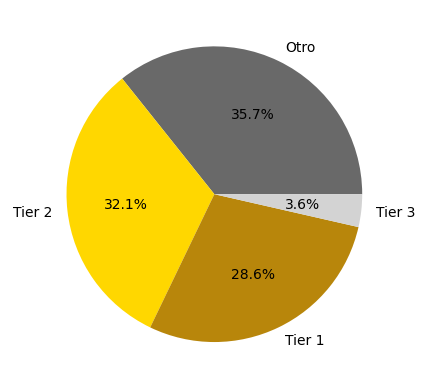

In [ ]:
df['Tier 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ["dimgrey", "gold", "darkgoldenrod", "lightgrey"])
plt.ylabel(' ')

Text(0, 0.5, ' ')

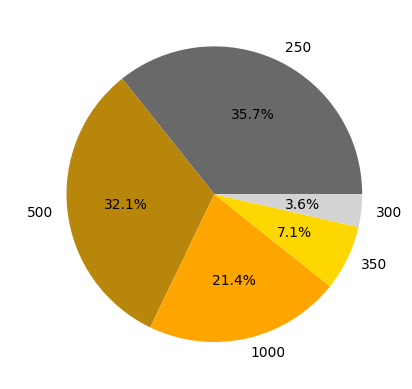

In [ ]:
df['tamaño'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ["dimgrey", "darkgoldenrod", "orange", "gold", "lightgrey"])
plt.ylabel(' ')

Text(0, 0.5, ' ')

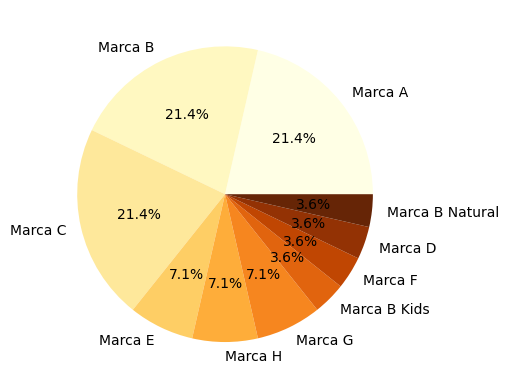

In [ ]:
df['Submarca'].value_counts().plot(kind='pie', autopct='%1.1f%%',colormap = 'YlOrBr')
plt.ylabel(' ')

In [ ]:
# Comportamiento de la categoría en el tiempo
df['año_semana'] = df['año'].astype(str) + '_' + df['semana'].astype(str).str.zfill(2)
df_categoria = df.groupby('año_semana')['Ventas Valor'].sum()  # Sumar ventas valor por semana

# Análisis de segmentos, tiers y tamaños
df_segmentos = df.groupby('Submarca')['Ventas Valor'].sum()  # Sumar ventas valor por submarca
df_tiers = df.groupby('Tier 1')['Ventas Valor'].sum()  # Sumar ventas valor por tier 1
df_tamaños = df.groupby('tamaño')['Ventas Valor'].sum()  # Sumar ventas valor por tamaño


In [ ]:
df['semana'] = df['semana'].astype(str).str.zfill(2)
df['año_semana'] = df['año'].astype(str) + '_' + df['semana']

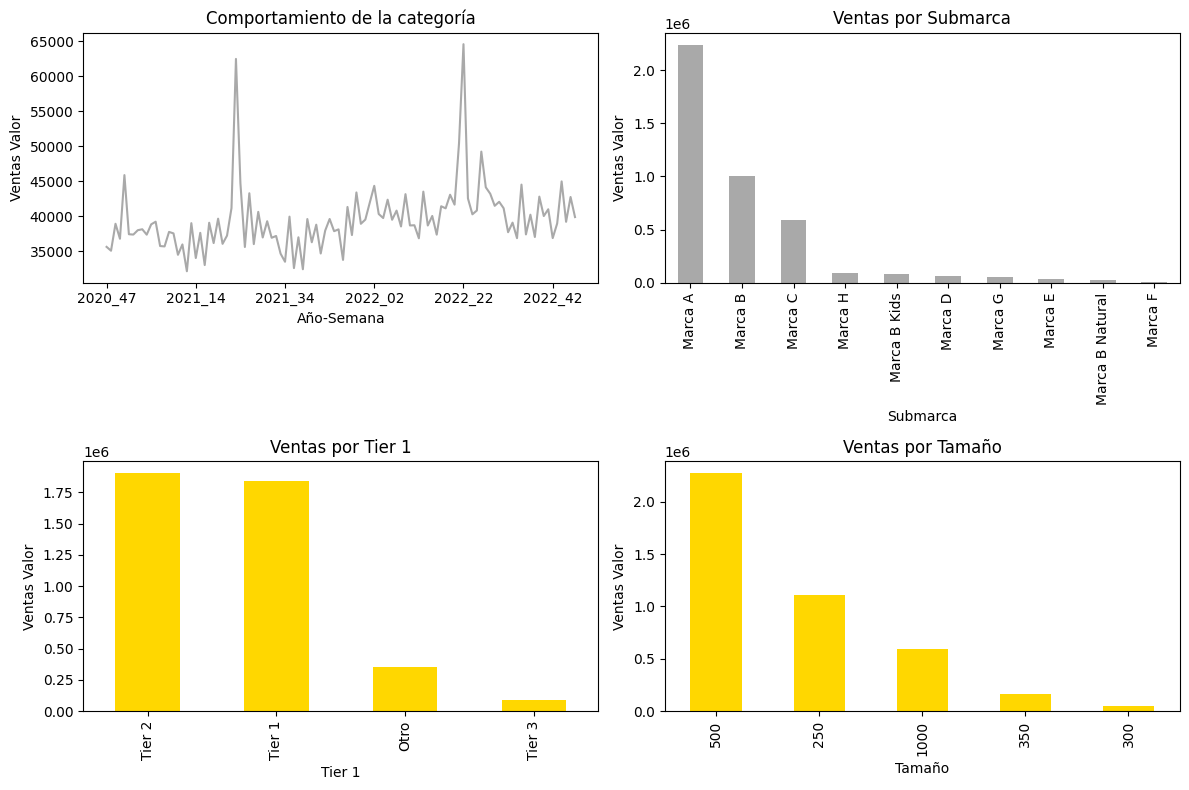

In [ ]:
import matplotlib.pyplot as plt

# Paleta personalizada de colores
colores_categoria = ['darkgray']  # Ejemplo de colores amarillo y gris claro
colores_segmentos = ['darkgray']  # Ejemplo de colores gris claro y gris oscuro
colores_tiers = ['gold']  # Ejemplo de colores amarillo y gris oscuro
colores_tamaños = ['gold']  # Ejemplo de colores amarillo y gris

# Comportamiento de la categoría en el tiempo
df['año_semana'] = df['año'].astype(str) + '_' + df['semana'].astype(str)
df_categoria = df.groupby('año_semana')['Ventas Valor'].sum()

plt.figure(figsize=(12, 8))

# Gráfico de comportamiento de la categoría
plt.subplot(2, 2, 1)
df_categoria.plot(kind='line', xlabel='Año-Semana', ylabel='Ventas Valor', title='Comportamiento de la categoría', color='darkgray')

# Gráfico de segmentos
plt.subplot(2, 2, 2)
df_segmentos.sort_values(ascending=False).plot(kind='bar', xlabel='Submarca', ylabel='Ventas Valor', title='Ventas por Submarca', color=colores_segmentos)

# Gráfico de tiers
plt.subplot(2, 2, 3)
df_tiers.sort_values(ascending=False).plot(kind='bar', xlabel='Tier 1', ylabel='Ventas Valor', title='Ventas por Tier 1', color=colores_tiers)

# Gráfico de tamaños
plt.subplot(2, 2, 4)
df_tamaños.sort_values(ascending=False).plot(kind='bar', xlabel='Tamaño', ylabel='Ventas Valor', title='Ventas por Tamaño', color=colores_tamaños)

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Comportamiento de la categoría'}, xlabel='Año-Semana', ylabel='precio item'>

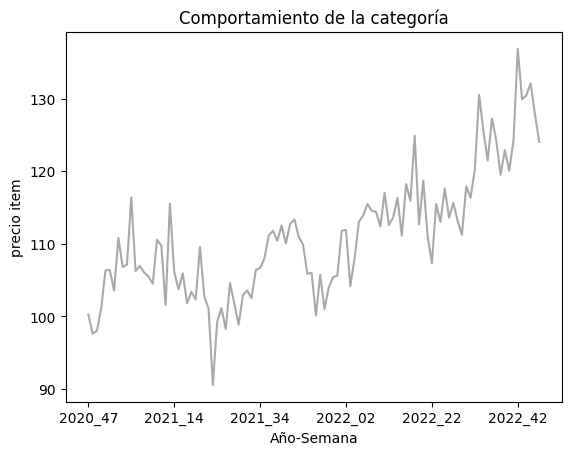

In [ ]:
df_categoria2 = df.groupby('año_semana')['Precio Del Item'].mean()
df_categoria2.plot(kind='line', xlabel='Año-Semana', ylabel='precio item', title='Comportamiento de la categoría', color='darkgray')

In [ ]:
df.head()

,periodo,año,semana,Tier 1,tamaño,Submarca,Ventas Unidades,Ventas Litros,Ventas Valor,Distribución,Precio Del Item,producto,año_semana
0,SEMANA 47-20,2020,47,Tier 1,250,Marca A,55.8,14.0,2484,86,44.516129,Marca A Tier 1 250,2020_47
1,SEMANA 48-20,2020,48,Tier 1,250,Marca A,53.2,13.4,2382,85,44.774436,Marca A Tier 1 250,2020_48
2,SEMANA 49-20,2020,49,Tier 1,250,Marca A,61.4,15.4,2762,85,44.983713,Marca A Tier 1 250,2020_49
3,SEMANA 50-20,2020,50,Tier 1,250,Marca A,59.0,14.8,2650,86,44.915254,Marca A Tier 1 250,2020_50
4,SEMANA 51-20,2020,51,Tier 1,250,Marca A,70.6,17.6,3176,87,44.985836,Marca A Tier 1 250,2020_51


In [ ]:
df = df.fillna(0)

<Axes: title={'center': 'Niveles de Share, Presencia y Precio'}, xlabel='Año-Semana'>

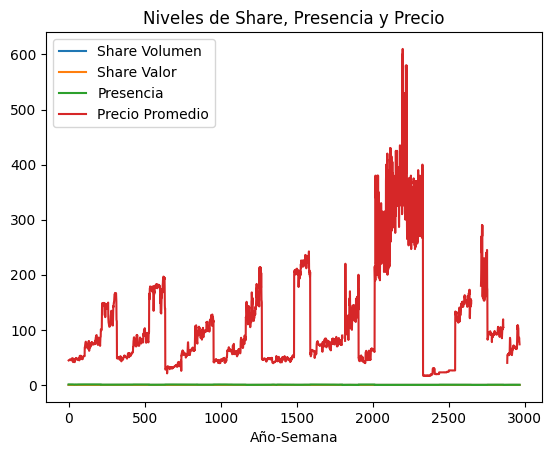

In [ ]:
# Calcular el share de volumen y valor
total_ventas_litros = df['Ventas Litros'].sum()
total_ventas_valor = df['Ventas Valor'].sum()

df['Share Volumen'] = df['Ventas Litros'] / total_ventas_litros
df['Share Valor'] = df['Ventas Valor'] / total_ventas_valor

# Calcular la presencia
df['Presencia'] = df['Distribución'] / 100

# Calcular el precio promedio
df['Precio Promedio'] = df['Ventas Valor'] / df['Ventas Unidades']

# Visualizar los niveles de share, presencia y precio
df[['Share Volumen', 'Share Valor', 'Presencia', 'Precio Promedio']].plot(kind='line', xlabel='Año-Semana', title='Niveles de Share, Presencia y Precio')


<Axes: title={'center': 'Evolución de las Ventas por Producto'}, xlabel='Año-Semana', ylabel='Ventas Valor'>

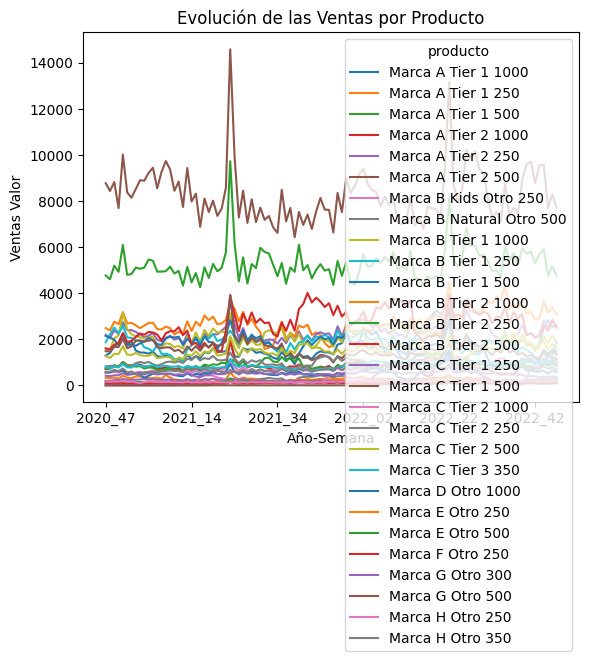

In [ ]:
# Calcular la evolución de las ventas valor por producto
df_evolucion = df.pivot_table(index='año_semana', columns='producto', values='Ventas Valor', aggfunc='sum')

# Visualizar la evolución de las ventas valor por producto
df_evolucion.plot(kind='line', xlabel='Año-Semana', ylabel='Ventas Valor', title='Evolución de las Ventas por Producto')


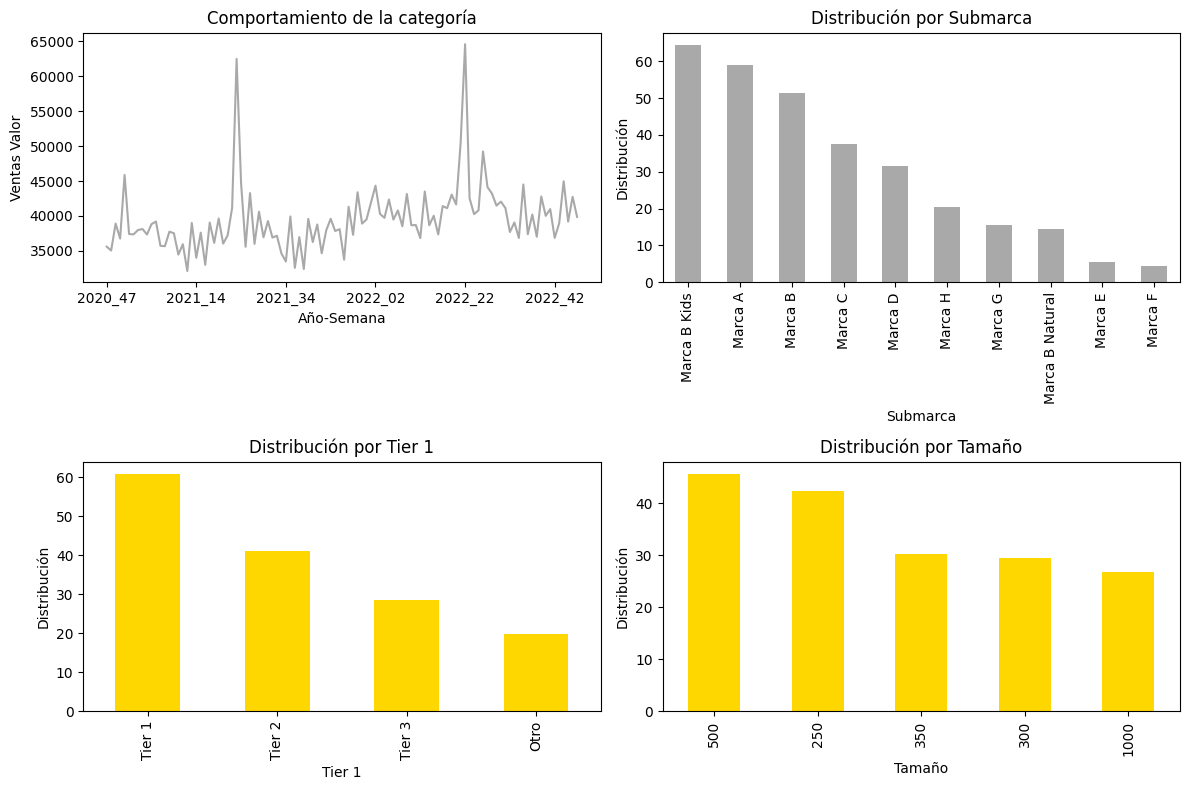

In [ ]:
plt.figure(figsize=(12, 8))
# Gráfico de comportamiento de la categoría
plt.subplot(2, 2, 1)
df_categoria.plot(kind='line', xlabel='Año-Semana', ylabel='Ventas Valor', title='Comportamiento de la categoría', color='darkgray')

# Gráfico de distribución de submarca
plt.subplot(2, 2, 2)
df_submarca = df.groupby('Submarca')['Distribución'].mean()
df_submarca.sort_values(ascending=False).plot(kind='bar', xlabel='Submarca', ylabel='Distribución', title='Distribución por Submarca', color=colores_segmentos)

# Gráfico de distribución de tier
plt.subplot(2, 2, 3)
df_tier = df.groupby('Tier 1')['Distribución'].mean()
df_tier.sort_values(ascending=False).plot(kind='bar', xlabel='Tier 1', ylabel='Distribución', title='Distribución por Tier 1', color=colores_tiers)

# Gráfico de distribución de tamaño
plt.subplot(2, 2, 4)
df_tamaño = df.groupby('tamaño')['Distribución'].mean()
df_tamaño.sort_values(ascending=False).plot(kind='bar', xlabel='Tamaño', ylabel='Distribución', title='Distribución por Tamaño', color=colores_tamaños)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribución por Submarca'}, xlabel='Submarca', ylabel='Distribución'>

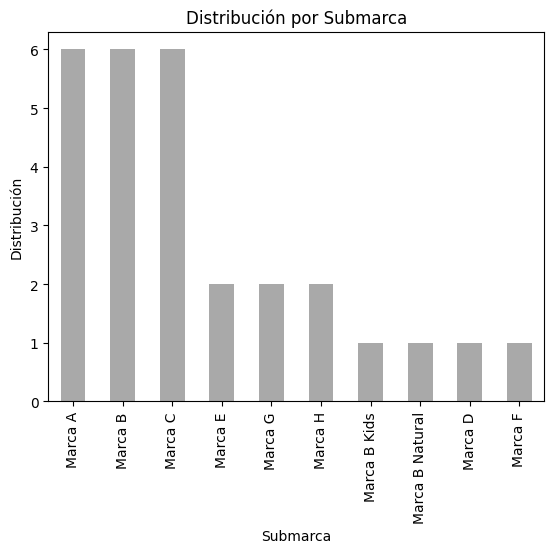

In [ ]:
sub_producto = df.groupby('Submarca')['producto'].nunique()
sub_producto.sort_values(ascending=False).plot(kind='bar', xlabel='Submarca', ylabel='Distribución', title='Distribución por Submarca', color=colores_segmentos)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la media de la distribución por producto
df_producto = df.groupby('producto')['Distribución'].mean()

# Ordenar los valores de forma descendente
df_producto_sorted = df_producto.sort_values(ascending=False)

# Obtener los valores únicos de la columna 'Submarca'
submarcas = df['Submarca'].unique()

# Crear una lista de colores basada en la cantidad de submarcas
colores_submarca = plt.cm.get_cmap('Set3', len(submarcas))

# Crear el gráfico de barras con los colores de cada submarca
plt.figure(figsize=(10, 6))

# Obtener los índices de las submarcas para asignar los colores
indice_colores = [list(submarcas).index(df.loc[producto, 'Submarca']) for producto in df_producto_sorted.index]

# Graficar las barras con los colores correspondientes
plt.bar(df_producto_sorted.index, df_producto_sorted, color=colores_submarca(indice_colores))

plt.xlabel('Producto')
plt.ylabel('Distribución')
plt.title('Distribución por producto')

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()  # Ajustar el espaciado

plt.show()

<ipython-input-22-113f3dfdcc91>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_submarca = plt.cm.get_cmap('Set3', len(submarcas))


KeyError: ignored

<Figure size 1000x600 with 0 Axes>

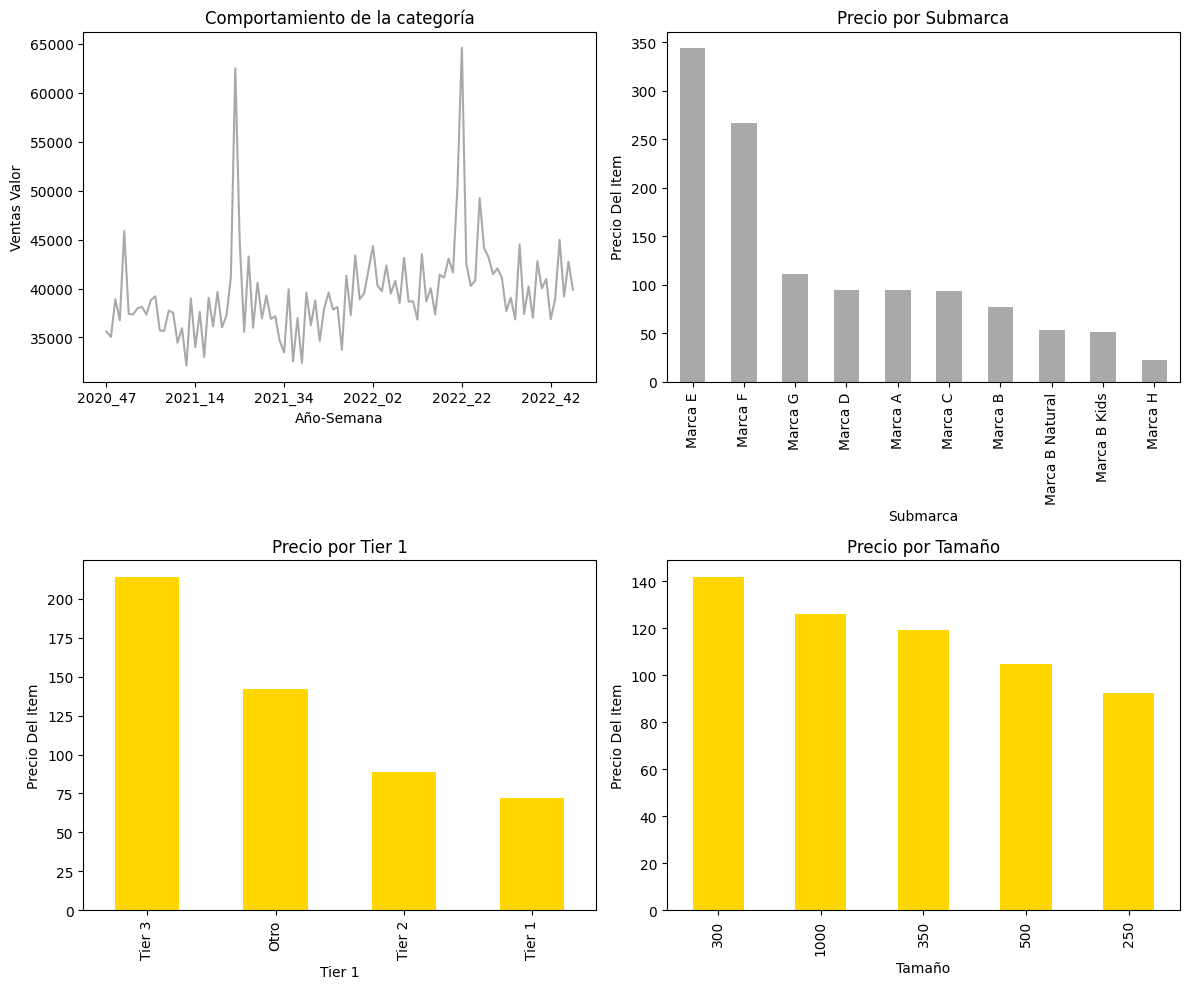

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Gráfico de comportamiento de la categoría
plt.subplot(2, 2, 1)
df_categoria.plot(kind='line', xlabel='Año-Semana', ylabel='Ventas Valor', title='Comportamiento de la categoría', color='darkgray')

# Gráfico de precio por submarca
plt.subplot(2, 2, 2)
df_submarca = df.groupby('Submarca')['Precio Del Item'].mean()
df_submarca.sort_values(ascending=False).plot(kind='bar', xlabel='Submarca', ylabel='Precio Del Item', title='Precio por Submarca', color=colores_segmentos)

# Gráfico de precio por tier
plt.subplot(2, 2, 3)
df_tier = df.groupby('Tier 1')['Precio Del Item'].mean()
df_tier.sort_values(ascending=False).plot(kind='bar', xlabel='Tier 1', ylabel='Precio Del Item', title='Precio por Tier 1', color=colores_tiers)

# Gráfico de precio por tamaño
plt.subplot(2, 2, 4)
df_tamaño = df.groupby('tamaño')['Precio Del Item'].mean()
df_tamaño.sort_values(ascending=False).plot(kind='bar', xlabel='Tamaño', ylabel='Precio Del Item', title='Precio por Tamaño', color=colores_tamaños)

plt.tight_layout()
plt.show()


In [ ]:
# Agrupar los datos por Submarca y Tier 1
grouped = df.groupby(['Submarca', 'Tier 1'])['Ventas Unidades'].sum().unstack()
grouped

Tier 1,Otro,Tier 1,Tier 2,Tier 3
Submarca,,,,
Marca A,NaN,14933.0,16022.4,NaN
Marca B,NaN,11147.2,6737.0,NaN
Marca B Kids,1626.0,NaN,NaN,NaN
Marca B Natural,336.0,NaN,NaN,NaN
Marca C,NaN,3585.0,4536.2,436.2
Marca D,665.6,NaN,NaN,NaN
Marca E,94.0,NaN,NaN,NaN
Marca F,38.6,NaN,NaN,NaN
Marca G,399.6,NaN,NaN,NaN


In [ ]:
df["proporcion_vendida"] = df["Ventas Unidades"] / df["Distribución"]

In [ ]:
grouped = df.groupby(['Submarca', 'Tier 1'])['proporcion_vendida'].mean().unstack()
grouped

Tier 1,Otro,Tier 1,Tier 2,Tier 3
Submarca,,,,
Marca A,NaN,0.617485,0.836418,NaN
Marca B,NaN,0.572312,0.439762,NaN
Marca B Kids,0.236888,NaN,NaN,NaN
Marca B Natural,0.222897,NaN,NaN,NaN
Marca C,NaN,0.301641,0.393824,0.145961
Marca D,0.195959,NaN,NaN,NaN
Marca E,0.081141,NaN,NaN,NaN
Marca F,0.081491,NaN,NaN,NaN
Marca G,0.114941,NaN,NaN,NaN


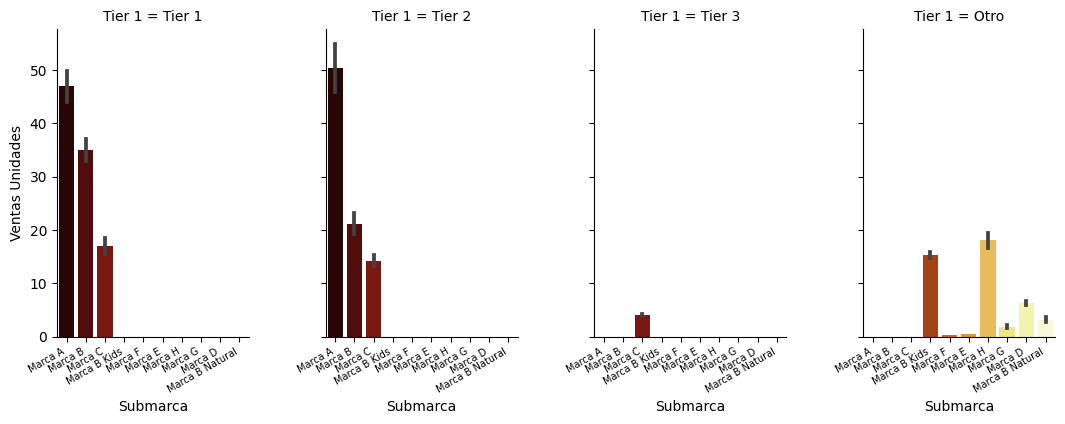

In [ ]:
ax=sns.catplot(
    data=df, x="Submarca", y="Ventas Unidades", col="Tier 1",
    kind="bar", height=4, aspect=.7, palette="afmhot" )
ax.set_xticklabels(rotation=30, horizontalalignment='right', fontsize = 7)

plt.show()

# Variables importantes

In [ ]:
df.head()

,periodo,año,semana,Tier 1,tamaño,Submarca,Ventas Unidades,Ventas Litros,Ventas Valor,Distribución,Precio Del Item,producto,año_semana,Share de Mercado,Share de Distribución,Share de Valor,Share Volumen,Share Valor,Presencia,Precio Promedio
0,SEMANA 47-20,2020,47,Tier 1,250,Marca A,55.8,14.0,2484,86,44.516129,Marca A Tier 1 250,2020_47,0.086660,7.269502,0.059270,0.000503,0.000593,0.86,44.516129
1,SEMANA 48-20,2020,48,Tier 1,250,Marca A,53.2,13.4,2382,85,44.774436,Marca A Tier 1 250,2020_48,0.082622,7.269502,0.056836,0.000481,0.000568,0.85,44.774436
2,SEMANA 49-20,2020,49,Tier 1,250,Marca A,61.4,15.4,2762,85,44.983713,Marca A Tier 1 250,2020_49,0.095357,7.269502,0.065903,0.000553,0.000659,0.85,44.983713
3,SEMANA 50-20,2020,50,Tier 1,250,Marca A,59.0,14.8,2650,86,44.915254,Marca A Tier 1 250,2020_50,0.091629,7.269502,0.063231,0.000532,0.000632,0.86,44.915254
4,SEMANA 51-20,2020,51,Tier 1,250,Marca A,70.6,17.6,3176,87,44.985836,Marca A Tier 1 250,2020_51,0.109645,7.269502,0.075781,0.000632,0.000758,0.87,44.985836


In [ ]:
categoricas = df.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['periodo', 'semana', 'Tier 1', 'Submarca', 'producto', 'año_semana'], dtype='object')

In [ ]:
for columna in categoricas:
  print(f"Los valores unicos de {columna} son {df[columna].unique()}")

Los valores unicos de periodo son ['SEMANA 47-20' 'SEMANA 48-20' 'SEMANA 49-20' 'SEMANA 50-20'
 'SEMANA 51-20' 'SEMANA 52-20' 'SEMANA 53-20' 'SEMANA 01-21'
 'SEMANA 02-21' 'SEMANA 03-21' 'SEMANA 04-21' 'SEMANA 05-21'
 'SEMANA 06-21' 'SEMANA 07-21' 'SEMANA 08-21' 'SEMANA 09-21'
 'SEMANA 10-21' 'SEMANA 11-21' 'SEMANA 12-21' 'SEMANA 13-21'
 'SEMANA 14-21' 'SEMANA 15-21' 'SEMANA 16-21' 'SEMANA 17-21'
 'SEMANA 18-21' 'SEMANA 19-21' 'SEMANA 20-21' 'SEMANA 21-21'
 'SEMANA 22-21' 'SEMANA 23-21' 'SEMANA 24-21' 'SEMANA 25-21'
 'SEMANA 26-21' 'SEMANA 27-21' 'SEMANA 28-21' 'SEMANA 29-21'
 'SEMANA 30-21' 'SEMANA 31-21' 'SEMANA 32-21' 'SEMANA 33-21'
 'SEMANA 34-21' 'SEMANA 35-21' 'SEMANA 36-21' 'SEMANA 37-21'
 'SEMANA 38-21' 'SEMANA 39-21' 'SEMANA 40-21' 'SEMANA 41-21'
 'SEMANA 42-21' 'SEMANA 43-21' 'SEMANA 44-21' 'SEMANA 45-21'
 'SEMANA 46-21' 'SEMANA 47-21' 'SEMANA 48-21' 'SEMANA 49-21'
 'SEMANA 50-21' 'SEMANA 51-21' 'SEMANA 52-21' 'SEMANA 01-22'
 'SEMANA 02-22' 'SEMANA 03-22' 'SEMANA 04-22' 'SEMA

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear instancia del codificador
encoder = LabelEncoder()

# Ajustar y transformar los datos de la columna 'Tier 1'
df['Tier 1_encoded'] = encoder.fit_transform(df['Tier 1'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear instancia del codificador
encoder = LabelEncoder()

# Ajustar y transformar los datos de la columna 'Submarca'
df['Submarca_encoded'] = encoder.fit_transform(df['Submarca'])



In [ ]:
df.head()

,periodo,año,semana,Tier 1,tamaño,Submarca,Ventas Unidades,Ventas Litros,Ventas Valor,Distribución,...,año_semana,Share de Mercado,Share de Distribución,Share de Valor,Share Volumen,Share Valor,Presencia,Precio Promedio,Tier 1_encoded,Submarca_encoded
0,SEMANA 47-20,2020,47,Tier 1,250,Marca A,55.8,14.0,2484,86,...,2020_47,0.086660,7.269502,0.059270,0.000503,0.000593,0.86,44.516129,1,0
1,SEMANA 48-20,2020,48,Tier 1,250,Marca A,53.2,13.4,2382,85,...,2020_48,0.082622,7.269502,0.056836,0.000481,0.000568,0.85,44.774436,1,0
2,SEMANA 49-20,2020,49,Tier 1,250,Marca A,61.4,15.4,2762,85,...,2020_49,0.095357,7.269502,0.065903,0.000553,0.000659,0.85,44.983713,1,0
3,SEMANA 50-20,2020,50,Tier 1,250,Marca A,59.0,14.8,2650,86,...,2020_50,0.091629,7.269502,0.063231,0.000532,0.000632,0.86,44.915254,1,0
4,SEMANA 51-20,2020,51,Tier 1,250,Marca A,70.6,17.6,3176,87,...,2020_51,0.109645,7.269502,0.075781,0.000632,0.000758,0.87,44.985836,1,0


In [ ]:
# Ejemplo: Crear un modelo de regresión para predecir las ventas valor en función de otras variables
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selección de variables predictoras
X = df[['Distribución', 'Precio Del Item','año', 'semana', 'tamaño', 'Tier 1_encoded', 'Submarca_encoded']]  # Variables predictoras
y = df['Ventas Valor']  # Variable a predecir

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
score = model.score(X_test, y_test)
print('R2 Score:', score)


R2 Score: 0.5027290999442638


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

model = LinearRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
0,Distribución,0.790944
6,Submarca_encoded,0.019664
5,Tier 1_encoded,0.016904
1,Precio Del Item,0.016729
4,tamaño,0.007094
2,año,0.000966
3,semana,0.000126


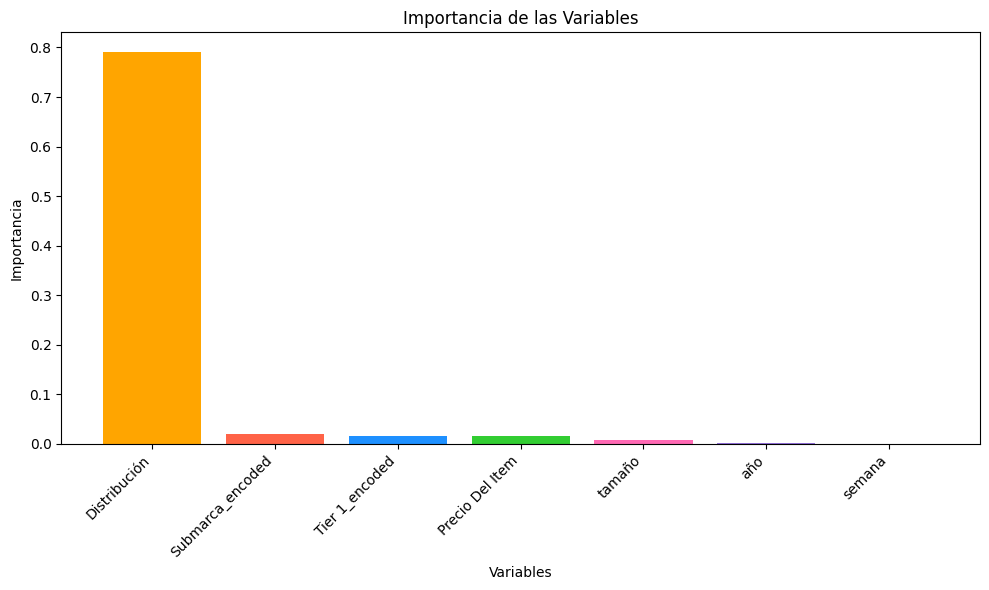

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['feature_importance'], color=['#FFA500', '#FF6347', '#1E90FF', '#32CD32', '#FF69B4', '#9370DB', '#FFD700'])
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables')

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()  # Ajustar el espaciado entre las barras

plt.show()


In [ ]:
# Ejemplo: Crear un modelo de regresión para predecir las ventas valor en función de otras variables
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selección de variables predictoras
X = df[['Distribución', 'Precio Del Item','año', 'semana', 'tamaño', 'Tier 1_encoded', 'Submarca_encoded']]  # Variables predictoras
y = df['Ventas Unidades']  # Variable a predecir

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
score = model.score(X_test, y_test)
print('R2 Score:', score)


R2 Score: 0.5849618068806731


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

model = LinearRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
0,Distribución,0.71533
6,Submarca_encoded,0.041393
4,tamaño,0.029566
1,Precio Del Item,0.004683
5,Tier 1_encoded,0.00229
2,año,0.000269
3,semana,0.00001


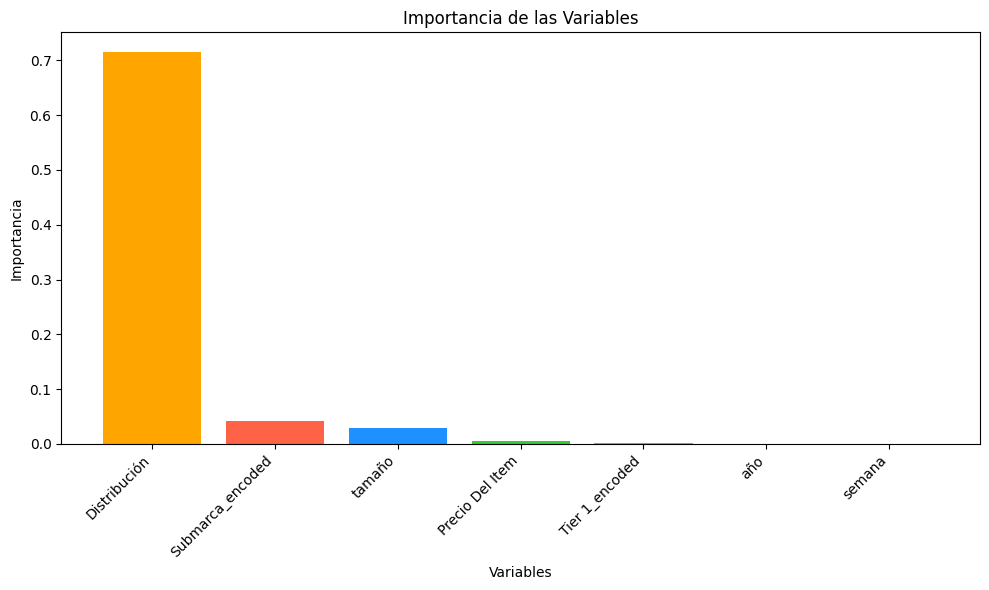

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['feature_importance'], color=['#FFA500', '#FF6347', '#1E90FF', '#32CD32', '#FF69B4', '#9370DB', '#FFD700'])
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables')

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()  # Ajustar el espaciado entre las barras

plt.show()
